In [2]:
using VMLS
using LinearAlgebra
using Plots
using Random
using Statistics

## Part A: Warm up (7 short exercises).

**Ex. A1:** The **[arithmetic mean](https://en.wikipedia.org/wiki/Mean#Arithmetic_mean_(AM))** (average) value $\mu$ of an $n$-dimensional vector $x$ can be calculated by the formula $\mu = \frac{1}{n}\sum_{i =1}^n x_i$. 

From linear algebra theory we know that with $1_n$ denoting the $n$-dimensional vector with ones (1) i all positions, the summation $\sum_{i =1}^n x_i$ can be calculated by the inner product $1_n^T x$, thus $\mu=\frac{1}{n}\sum_{i =1}^n x_i=\frac{1}{n}(1_n^T x)$. 

From Julia programming we also know that the dimension ($n$) of a vector $x$ can be found by `n = size(x,1)`, and that an $n$-vector of ones is given by `ones(n)`. 

Use this information and define your own Julia function `mymean(x)` to calculate the mean value of vectors. Fill in the required line(s) of code in the following "skeleton" to provide your solution.

In [3]:
function mymean(x)
    n = size(x,1);
    μ = ones(n)'*x/n;
    
end

mymean (generic function with 1 method)

It's a good idea to check that your `mymean`-function is working correctly by comparing its calculations to the `avg(x)` -function in the VMLS-package for some real /random vectors:

**Ex. A2:** Explain the following lines of code by making informative comments (comments in Norwegian is fine):

In [4]:
# Tester mellom mymean og avg

nT = 10000;                   # tester for 10000 tall
mymeanTest = zeros(nT, 2);    # lagrer resultater i tom matrise

for k = 1:nT                   # for-løkke fra 1 til nT
  n = rand(1:1000);            # tilfeldig tall mellom 1 og 1000
  x = n*rand(n);               # lager en tilfeldig vektor med n elementer
  mymeanTest[k,1] = mymean(x); # tester mymean
  mymeanTest[k,2] = avg(x);    # tester avg
end

dT = mymeanTest[:,1]-mymeanTest[:,2];  # Regner ut forskjellen mellom mymean og avg for hver test
norm(dT)                               # Normen skal være omtrent lik 0, regner ut normen til differansen

1.3539347611002294e-11

**Ex. A3:** The **[standard deviation](https://en.wikipedia.org/wiki/Standard_deviation#Discrete_random_variable)** of the values in an $n$-dimensional vector $x$ can be calculated by the formula $\sigma = \sqrt{\frac{1}{n}\sum_{i =1}^n (x_i-\mu)^2}$, where $\mu$ is the (arithmetic) mean defined above. 

Use this to define your own Julia function `mystd(x)` that calculates the standard deviation of vectors. Fill in the required line(s) of code in the "skeleton" below to provide your solution. 

**Hint:** The statement `(x.-μ).^2` in Julia computes the squared differences $(x_i-\mu)^2$ as a vector, and use this information and your `mymean`-function to calculate $\frac{1}{n}\sum_{i =1}^n (x_i-\mu)^2$. For calculating the square root of any number `t` in Julia you can use the square root function `sqrt(t)`.

In [5]:
function mystd(x)
    μ = mymean(x)
    σ = sqrt(mymean((x .- μ).^2))
    return σ
end

mystd (generic function with 1 method)

**Ex. A4:** Now, it's required to check that your `mystd`-function is working correctly by comparing its calculations to the `stdev(x)`-function in the VMLS-package for some real /random vectors. Copy and modify the code from exercise 2. above to do the comparisons.

In [6]:
# Vi skal teste om mystd fungerer som den skal, ved å sammenligne med den innebygde funksjonen stdev.

nT = 10000;                   # tester for 10000 tall
mystdTest = zeros(nT, 2);    # lager en tom matrise for å lagre resultater

for k = 1:nT                   # for-løkke fra 1 til nT
  n = rand(1:1000);            # tilfeldig tall mellom 1 og 1000
  x = n*rand(n);               # lager en tilfeldig vektor med n elementer
  mystdTest[k,1] = mystd(x); # tester mymean
  mystdTest[k,2] = stdev(x);    # tester avg
end

dT = mystdTest[:,1]-mystdTest[:,2];  # Regner ut forskjellen mellom mymean og avg for hver test
norm(dT)                               # Normen skal være omtrent lik 0, regner ut normen til differansen

7.422088289503646e-12

The [**correlation coefficient between two $n$-dimensional vectors $x$ and $y$**](https://en.wikipedia.org/wiki/Correlation#Sample_correlation_coefficient) can be defined as $\rho = \frac{\sum_{i=1}^n(x_i-\mu_x)(y_i-\mu_y)}{\sqrt{\sum_{i=1}^n(x_i-\mu_x)^2\sum_{i=1}^n(y_i-\mu_y)^2}}$, where $\mu_x$ and $\mu_y$ are the arithmetic means of $x$ and $y$, respectively.

**Ex. A5:** Use this to define your own Julia function `mycorr(x,y)` that calculates the correlation coefficient between two $n$-dimensional vectors $x$ and $y$ without coding the summation formulas in the definitions. Fill in the required line(s) of code in the "skeleton" below to provide your solution.

In [7]:
function mycorr(x, y)
    μx = mymean(x)
    μy = mymean(y)

    σx² = (x .- μx)'* (x .- μx)
    σy² = (y .- μy)'* (y .- μy)

    ρ = (x .- μx)'* (y .- μy) / sqrt(σx² * σy²)

    return ρ
end

mycorr (generic function with 1 method)

In [8]:
x = [1,2,3]

y = [1,2,3]

mycorr(x,y)

1.0

**Ex A6:** Recall that the [**cosine of the angle $\theta$** between two $n$-dimensional vectors](https://en.wikipedia.org/wiki/Dot_product#Geometric_definition) $x$ and $y$ ([see also in VMLS, page 57](https://web.stanford.edu/~boyd/vmls/vmls.pdf#page=67)) is given by the definition $\cos(\theta) = \frac{x^Ty}{\|x\|\|y\|}$. Define your own Julia function `mycos(x,y)` by filling in the required line(s) of code in the following "skeleton": 

In [9]:
function mycos(x,y)
    cosθ = (x'*y) / (sqrt(x'*x) * sqrt(y'*y))
    return cosθ
end

mycos (generic function with 1 method)

In [10]:
x = [1,2]
y = [-1,-2]

x_norm = mycos(x,y)

-0.9999999999999998

Denote the **mean centered** versions of the vectors $x$ and $y$ as $x_c=x-\mu_x$ and $y_c = y-\mu_y$,  respectively. 

**Ex. A7:** Verify numerically that **the correlation coefficient** between $x$ and $y$ is identical to the **cosine of the angle** between the corresponding mean centered vectors $x_c$ and $y_c$. Copy and modify the code from exercise 2. above to do the comparisons.

In [11]:
# <... fill in introduction first ....>:
# Test for å sjekke vinkelen og korrelasjonen mellom vektorer

nT = 10000;                   # tester for 10000 tall
arr = zeros(nT, 3);    # lagrer resultater i tom matrise

for k = 1:nT                   
  n = rand(1:1000);            
  x = n*rand(n); 
  y = n*rand(n)
  
  corr = mycorr(x,y)

  x_c = x .- mymean(x)
  y_c = y .- mymean(y)

  cos_c = mycos(x_c, y_c)

  diff = abs(corr .- cos_c)

  # Store results
  arr[k, 1] = corr
  arr[k, 2] = cos_c
  arr[k, 3] = diff
end

arr

10000×3 Matrix{Float64}:
 -0.122695     -0.122695     0.0
  0.044309      0.044309     6.93889e-18
  0.00115825    0.00115825   0.0
 -0.0173231    -0.0173231    0.0
  0.12653       0.12653      0.0
 -0.0173658    -0.0173658    0.0
 -0.0443901    -0.0443901    6.93889e-18
 -0.109253     -0.109253     0.0
 -0.16366      -0.16366      0.0
  0.00750831    0.00750831   8.67362e-19
  ⋮                          
 -0.101819     -0.101819     0.0
  0.047532      0.047532     6.93889e-18
  0.0387246     0.0387246    0.0
  0.000732884   0.000732884  0.0
  0.0624432     0.0624432    6.93889e-18
 -0.00472624   -0.00472624   1.73472e-18
  0.0587442     0.0587442    0.0
 -0.0945459    -0.0945459    0.0
  0.0579207     0.0579207    0.0

In [12]:
print(maximum(arr[:,3]))

NaN

## Part B: An alternative approach for estimating the linear least squares solution (3 short exercises).

Here we will work a little more with the **Sacramento house sales data** used in [section 2.3](https://web.stanford.edu/~boyd/vmls/vmls.pdf#page=48) and [chapter 13](https://web.stanford.edu/~boyd/vmls/vmls.pdf#page=265) of VMLS. 

By using a constant vector of ones togeter with $x_1$, $x_2$ and $x_3$ described in the Julia-code below as the columns in the $774\times 4$ feature data matrix $X$, we can compute the linear least squares solution of $$Xb = y,$$ (where $y$ is the selling price in the units of 1000 dollars for each of the recorded 774 house sales to be predicted by later applications of the resulting model) as follows:

In [13]:
D = house_sales_data();
y = D["price"];     # price in thousand dollars.
n = length(y);

# The "original" features:
x1 = D["area"];     # area of house (in 1000ft^2).
x2 = D["beds"];     # number of bedrooms.
x3 = D["baths"];    # number of bathrooms.

X1 = [x1 x2 x3];    # The matrix of non-constant features

# The data matrix for modelling with a constant term:
X = [ones(n) X1];

# The least squares solution β of the system Xb = y is:
β = X\y;

# The fitted values (yhat) and the model residuals (r) based on the regression model are:
yhat = X*β;
r = (y-yhat);

# The RMS-value of this model is
rmsβ = rms(r)

74.84529806987045

**Ex. B1:** Compare this rms-value to the **rms**-value of the constant model by using the function `mystd` from **Part A**.

In [14]:
# Fill in to calculate the rms-value of the constant model by using mystd:
rmsβ_mystd = sqrt(mymean(r.^2))

74.84529806987047

In the following we will focus on the matrix $X_1$ of non-constant column features ($x_1$, $x_2$ and $x_3$). 

**Note** that your function `mymean`from **Part A** should also be capable of simultaneously calculating the mean value for all columns of any matrix, so that the result is a row vector of dimension equal to the number of matrix columns. 

We denote the **centered version of** the vector $y$ as $y_s$ and the centered version of the matrix $X_1$ as $X_s$, where $y_s$ and $X_s$ are obtained by substracting the column means $\mu_y$ and $\mu_X$ from all entries in the corresponding columns of $y$ and $X_1$ as follows:

In [15]:
μy = mymean(y); μX = mymean(X1)
ys = y  .- μy;
Xs = X1 .- μX;
mymean(ys), mymean(Xs)  # Clearly, the column means of y0 and X0 are all effectively 0

(4.5386605757079266e-14, [1.1159606113157258e-16 -1.7098008337896468e-16 2.6392898776618707e-17])

**Ex. B2:** Compute the linear least squares solution $\beta_s$ of the mean centered system $$X_sb = y_s.$$ Also calculate the fitted values $\hat{y_s}=X_s\beta_s$ and the $rms_{\beta_s}$-value of the model residuals $r_s=(y_s-\hat{y_s})$. Compare $rms_{\beta_s}$ to $rms_{\beta}$ and the entries of $\beta_s$ to the last three entries $\beta_{2:4}$ of the least squares solution $\beta$ calculated above to conclude that they are identical (theoretically this is true for any linear least squares problem).


In [16]:

βs = Xs\ys;
yshat = Xs*βs;
rs = ys - yshat;
rmsβs = rms(rs)

# Compare rms-values and the regression coeff. entries:
println("Difference in rms-values (rms_β - rms_β_s): ", rmsβ - rmsβs)
println("Norm of difference between β_s and β[2:4]: ", norm(βs - β[2:4]))


Difference in rms-values (rms_β - rms_β_s): -2.842170943040401e-14
Norm of difference between β_s and β[2:4]: 1.72613654168562e-13


**Ex. B3:** Verify numerically the identity 
$$ \mu_y = \beta_1 + \mu_X\beta_s,$$ 
where $\beta_1$ is the first entry of the least squares solution vector $\beta$ of the system $Xb = y$, to conclude that both $\beta_1$ and $\beta_{2:4}$ (and hence $\beta$) can be calculated from the solution of the mean centered system (theoretically this is true for any linear least squares problem). 

In [17]:
β1 = μy - μX*βs;

α = [β1; βs];    # All regression coeffs calculated from the mean centered problem:
[α β]            # Compare       

4×2 Matrix{Float64}:
  54.6692     54.6692
 149.051     149.051
 -18.7369    -18.7369
  -0.596478   -0.596478

## Part C: QR-factorization and projection matrices (3 short exercises).

As above we will assume that the matrix $X$ has $n$ rows and $p<n$ columns. In the notation of Part B, the [normal equations](https://web.stanford.edu/~boyd/vmls/vmls.pdf#page=249) for solving linear least squares problems are
$$X^TXb = X^Ty,$$
and under the assumption that the $X$-columns are linearly independent $X^TX$ is invertible. The associated least squares solution is given by $\beta = (X^TX)^{-1}X^Ty$. 

We obtain the fitted values $$\hat{y} = X\beta= X(X^TX)^{-1}X^Ty=Py,$$
where the $n\times n$ matrix $P\overset{def}{=}X(X^TX)^{-1}X^T$ is called **the projection matrix** onto the column space of $X$, i.e. the fitted values $\hat{y}$ is the the result of projecting $y$ onto the column space.

**Ex. C1:** Calculate the QR-factorization  $QR =X$, and verify nummerically (using the **Sacramento house sales data**) that $H = QQ^T = X(X^TX)^{-1}X^T = P$. 

In [18]:
D = house_sales_data();
y = D["price"]; n = length(y); 
x0 = ones(n); x1 = D["area"]; x2 = D["beds"]; x3 = D["baths"];      
X = [x0 x1 x2 x3];

P = X * (X' * X)^-1 * X'
Q,R = qr(X); Q = Matrix(Q)
H   = Q * Q'          
norm(P - H)

1.2067870827176724e-14

The vector $x_0$ in the code above is the constant vector with ones (1) in all positions.

**Ex. C2:** Compute the projection matrix $P_0$ onto the columnspace of $x_0$, and explain the result of projecting $y$, i.e. describe the vector $P_0y$. Also explain the QR-factorization of $X_0$.

In [19]:
<fill in the required code...>
P₀*y, mymean(y) # Compre these & comment.



Base.Meta.ParseError: ParseError:
# Error @ /Users/endreasgard/mla210/mandatory/Project1-2024.ipynb:1:1
<fill in the required code...>
╙ ── not a unary operator

**Ex. C3:** Define $C = I_n - P_0$, where $I_n$ is the $n\times n$ identity matrix. Describe the  function of $C$ by inspecting the result of the matrix multiplication $CX_1$. 

This matrix has actually been calculated/used in a previous exercise - under what name?

In [20]:
C = <fill in ...>;
CX1 = C*X1;
norm(CX1-Xs) # Compre & comment.

Base.Meta.ParseError: ParseError:
# Error @ /Users/endreasgard/mla210/mandatory/Project1-2024.ipynb:1:5
C = <fill in ...>;
#   ╙ ── not a unary operator

## Part D: $k$-means clustering  - two alternative algorithms + one more (4 exercises).

In [VMLS chapter 4.3](https://web.stanford.edu/~boyd/vmls/vmls.pdf#page=84) the **$k$-means clustering algorithm is described**, and we also wrote the following Julia-version of the algorithm for grouping data into $k$ separate clusters:

In [21]:
function kmeans_(x, k; maxiters = 100, tol = 1e-5)                                                                 
    # By writing kmeans_ instead of kmeans to display this implementation                                           
    # INPUTS:  x - a set of vectors, k - the number of clusters to be calculated, maxiters - the maximum number 
    #          of iterations in the algorithm, tol - the (relative) tolerance limit for convergence.
    # OUTPUTs: c - cluster labels assigned for each sample, z - the (k) cluster centers, J - the objective 
    #          function values for each cluster iteration.
    
    N = length(x)     # Number of samples (vectors in x)                                                                         #  4
    d = length(x[1])  # dimension of the sample vectors.                                                          
    distances = zeros(N) # used to store the distance of each sample to the nearest representative.               
                                                                                                                   
    z = [zeros(d) for j=1:k] # used to store representatives.                                                        
    Js = zeros(maxiters);    # For storing the objective function values of the process                                                                                                           #  9
    # ’c’ is an array of N integers between 1 and k. The initial cluster assignment in c is chosen randomly.       
    c = [ rand(1:k) for i in 1:N ]                                                                                 
                                                                                                                   
    Jprevious = Inf # used in stopping condition                                                                  
    for iter = 1:maxiters                                                                                          
                                                                                                                   
        # Cluster j representative is average of points in cluster j.                                              
        for j = 1:k                                                                                                
            cj = [i for i=1:N if c[i] == j] # find the indices of the samples associated with cluster j            
            z[j] = sum(x[cj]) / length(cj); # the updated center of cluster j (the mean of the associated samples) 
        end;                                                                                                       
                                                                                                                   
        # For each x[i], find distance to the nearest representative                                               
        # and update its group index.                                                                              
        for i = 1:N                                                                                                
            (distances[i], c[i]) =                                                                                 
                findmin([norm(x[i] - z[j]) for j = 1:k])                                                           
        end;                                                                                                       
                                                                                                                   
        # Compute clustering objective value of the current clustering.                                            
        J = distances'*distances/N                                                                                 
        Js[iter] = J;                                                                                              
        # Show progress and terminate if J stopped decreasing or maximun number of iterations occur.               
        println("Iteration ", iter, ": Jclust = ", J, ".")                                                         
        if (iter > 1 && abs(J - Jprevious) < tol * J) || iter == maxiters                                          
            Js = Js[1:iter];                                                                                       
            return c, z, Js                                                                                        
        end                                                                                                        
        Jprevious = J                                                                                              
    end                                                                                                                                                                                                                              
end                                                                                

kmeans_ (generic function with 1 method)

**Note:** This algorithm is designed to operate on datasets where __the objects to be clustered are represented in a vector of vectors__.

### An alternative implementation of the $k$-means algorithm

Consider the following alternative implementation of the k-means algorithm, where __the objects to be clustered are represented as the rows of a matrix__.

In [22]:
function newkmeans(X, k; tol = 5e-3)
# ------------- Another implementation of the k-means algorithm -------------------
# INPUT: ----------------------------------------------------------------------
# X        - data matrix (observed datapoints are rows in X).
# k        - the number of clusters (an integer >= 2, typically 2 to something smaller than the number of rows in X).
# OUTPUT: ---------------------------------------------------------------------
# C        - vector of final cluster labels (1,..,k) assigned to each datapoint.
# Z        - matrix of final cluster centers (given as rows)
# JS       - objective function values describing the clustering process (J small means good clustering)
# cs       - the sizes of each cluster
# -----------------------------------------------------------------------------
JS = [];                             # objective function values describing the mean squared distances of the clustering process.
N      = size(X,1);                  # number of samples (rows) in tha data matrix
D2     = Array{Float64}(undef, N, k);# Matrix for storing distances between samples and cluster centers. #D2 = zeros(N, k); %D2 = nan(N,k);
C      = zeros(N);                   # N-vector of the cluster assignments
cs     = zeros(k);                   # k-vector to contain the cluster sizes

Jcurrent = 0; Jprevious = -1;     # Jcurrent and Jprevious represent objective function values - to be updated in the clustering process.

ids = randperm(N)[1:k];           # Generate k random integers in [1, N] for random selection of cluster centers from X.
Z   = copy(X[ids,:]);             # The initial randomy selected cluster centers according to "ids" above.

iter = 1;                         # For counting the number of iterations before convergence

while abs((Jcurrent-Jprevious)/Jprevious) > tol    # Repeat until convergence of the objective function values
    for i = 1:k # Here we calculate all the distances between X-rows and the cluster centers
        D2[:,i] = sum((X.-Z[[i],:]).^2, dims=2); # Squared euclidean distance for all samples to i-th cluster center.
    end
    
    # Identify shortest distance and corresponding cluster number for each observation:
    minD2, C = findmin(D2, dims=2); C = getindex.(C,2); # convert from CartesianIndex to column number  
    # update old and new objective function values
    Jprevious = Jcurrent; Jcurrent = sum(minD2)/N; JS = [JS; Jcurrent];                    

    # Update the cluster centers based on the labelling of Cid:
    for i = 1:k
        rows_i = findall(vec(C.==i));                   # Find row-numbers of all cluster members of the i-th cluster.
        cs[i] = length(rows_i)                          # Number of samples in cluster i.
        if cs[i]>0                                      # Update if i-th cluster is non-empty.
        Z[i,:] = sum(X[rows_i,:],dims = 1)./cs[i]       # Update cluster centers as the mean of the cluster members.
        end
    end, println("Iteration ", iter, ": Jclust = ", Jcurrent, ".");  
    iter +=1
end 

return C, Z, JS, cs;
end

newkmeans (generic function with 1 method)

### Here we run both algorithms on the same dataset:

Iteration 1: Jclust = 0.9943488541413426.
Iteration 2: Jclust = 0.5000012342144204.
Iteration 3: Jclust = 0.2293862291923719.
Iteration 4: Jclust = 0.15779742758709378.
Iteration 5: Jclust = 0.15558860243248993.
Iteration 6: Jclust = 0.15558860243248993.


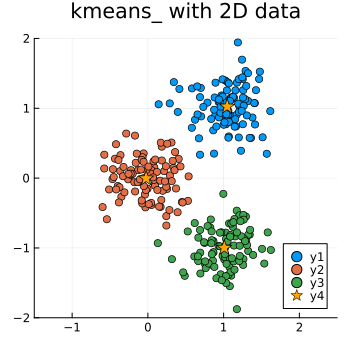

In [23]:
# Generate a vector of random 2D-vectors for testing the two algorithms:
X = vcat( [ 0.3*randn(2) for i = 1:100 ],
[ [1,1] + 0.3*randn(2) for i = 1:100 ],
[ [1,-1] + 0.3*randn(2) for i = 1:100 ] );


k = 3;
c, z, J = kmeans_(X, k);   # k-means clustering by the above algorithm

# Scatter plot of the clustering solution
N = length(X)
scatter(title = "kmeans_ with 2D data",
    label = " ", legend = :bottomright, size = (350,350), xlims = (-1.5,2.5), ylims = (-2,2))
for j = 1:k
    Cj = [X[i] for i=1:N if c[i] == j]
    scatter!([x[1] for x in Cj], [x[2] for x in Cj])
end
# Add cluster centers to the scatter plot:
scatter!([cs[1] for cs in z], [cs[2] for cs in z], marker = :star, markersize = 8, color = :orange)


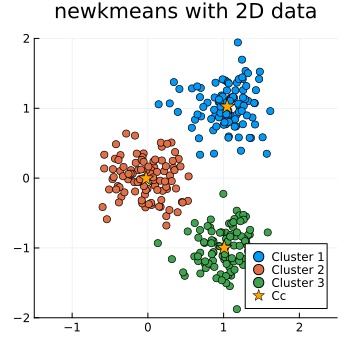

Iteration 1: Jclust = 1.0014292563685865.
Iteration 2: Jclust = 0.39294772491245133.
Iteration 3: Jclust = 0.1916533572285197.
Iteration 4: Jclust = 0.15606997066490463.
Iteration 5: Jclust = 0.1555886024324899.


In [24]:
# Here we convert the vector X of vectors defined above into a matrix XX where the elements of X become the row-vectors of XX:
XX = hcat(X...)' 

## Now, we run the new algorithm with the data in matrix format
k = 3;
Cid, Cc, J, cs = newkmeans(XX, k; tol = 5e-3);

# Scatter plot of the clustering solution
p = scatter(title = "newkmeans with 2D data",
    label = " ", legend = :bottomright, size = (350,350), xlims = (-1.5,2.5), ylims = (-2,2))
    for i=1:k
        snr = findall(vec(Cid.==i)); # the sample numbers of the i-th cluster
        scatter!(p, XX[snr,1], XX[snr,2], label = string("Cluster ",i))
    end
# Add cluster centers to the scatter plot:
scatter!(p, Cc[:,1],Cc[:,2], marker = :star, markersize = 8, color = :orange, label = "Cc")
display(p)

**Ex. D1:** Compare the two alogorithms, and comment on their main differences (regarding initialization and convergence/termination).

The difference between the two codes is that the first one iterates through each element, while the other one takes a vectorized approach. Meaning that the second one will converge faster. If the vectorized approach doesnt converge perfectly, it will never terminate, because of the tolerance, the first one will terminate if the maxiter limit is met.

With initialization, the first one approaches this by assigning each vector in the matrix to a random cluster and then calculates the mean within each cluster to set a centroid point. The second one initializes by picking random points for each cluster and then calculating the distance to each point in the matrix and assigning the closest point to the cluster.

 **Ex. D2:** Modify the "newkmeans"-algorithm into a version **"anewkmeans"** that compare angles between vectors instead of distances by utilizing the [Cosine distance](https://en.wikipedia.org/wiki/Cosine_similarity#Definition)s between a row vector ($v$), and all the rows of a matrix ($X$) as implemented by the function:

In [25]:
allCosDist_(X,v) = 1 .- ((X*v)./(norm(v)*sqrt.(sum(X.^2,dims = 2)))).^2

allCosDist_ (generic function with 1 method)

 **Ex. D3:** Apply the **"anewkmeans"-algorithm** to the wikipedia data as described in [section 4.4.2 of the VMLS Julia companion](https://web.stanford.edu/~boyd/vmls/vmls-julia-companion.pdf#page=46) (display most frequent words in each cluster and the titles (documents) most similar to the cluster centers):

In [43]:
articles, dictionary, titles = wikipedia_data();
art = hcat(articles...)';
N = size(art,1)




Iteration 1: Jclust = 0.0010287801606183012.
Iteration 2: Jclust = 0.0009974305804033017.
Iteration 3: Jclust = 0.0009807479081295606.
Iteration 4: Jclust = 0.0009670273526685048.
Iteration 5: Jclust = 0.0009593976236889141.
Iteration 6: Jclust = 0.0009539323387664805.
Iteration 7: Jclust = 0.0009484148692008782.
Iteration 8: Jclust = 0.0009456718985399829.
Iteration 9: Jclust = 0.0009434188546914079.
Iteration 10: Jclust = 0.0009413380009204492.
Iteration 11: Jclust = 0.000939612194545766.
Iteration 12: Jclust = 0.0009383411095345527.
Iteration 13: Jclust = 0.0009374509432844959.
Iteration 14: Jclust = 0.0009367828525419511.
Iteration 15: Jclust = 0.0009359887337698757.
Iteration 16: Jclust = 0.0009357119742333435.
Iteration 17: Jclust = 0.0009353777811642701.
Iteration 18: Jclust = 0.0009350630619024041.
Iteration 19: Jclust = 0.0009347586857699383.
Iteration 20: Jclust = 0.0009326852782397347.
Iteration 21: Jclust = 0.0009266606692195754.
Iteration 22: Jclust = 0.0009231973840193949

([2, 2, 1, 2, 1, 2, 2, 2, 2, 2  …  5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [[0.0, 0.0013257580000000002, 0.005294947111111111, 0.004328121444444445, 0.0014684263333333335, 0.007705932222222222, 0.010352712222222222, 0.009578544444444444, 0.004409172222222222, 0.0006574622222222222  …  0.01107753888888889, 0.0006858711111111111, 0.012190876666666664, 0.004292651222222222, 0.014084925555555556, 0.0005098404444444445, 0.013671875555555556, 0.007426441555555556, 0.0003483111111111111, 0.01125175888888889], [0.00082859875, 0.0005149149062500001, 0.0014659328906250003, 0.003732692093749999, 0.0019076484999999998, 0.0021965790781249997, 0.00199756109375, 0.0012033059375, 0.0014260923437500002, 0.001489562125  …  0.0022658615625, 0.0013020837500000004, 0.0026939674999999995, 0.0013035411093749996, 0.00170924925, 0.00080299775, 0.0012715649375000004, 0.0012585700937500003, 0.00240007953125, 0.002340451562499999], [0.0005359522753346077, 0.0005551448527724655, 0.0006691445086042066, 0.0004817938642447406

 **Ex. D4:** How stable are the cluster solutions you obtain for the wikipedia data using a fixed number ($k=10$) of clusters in the **"anewkmeans"**-algorithm. Discuss/implement an improvenent of your algorithm and compare for the same (wikipedia) data.